In [1]:
# Set up (Don't need to run this if you cloned the repo)
download_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/university/university.data'
!curl $download_link -o university.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  156k  100  156k    0     0   253k      0 --:--:-- --:--:-- --:--:--  253k


In [2]:
# Convert this random format into python dict
import re

university_data = {}
with open('university.data') as f:
  valid_keys = ['name', 'state', 'control', 'no-of-students', 'male:female', 
                'student:faculty', 'sat verbal', 'sat math', 'expenses', 
                'percent-financial-aid', 'no-applicants', 'percent-admittance', 
                'percent-enrolled', 'academics scale:1-5', 'social scale:1-5', 
                'quality-of-life scale:1-5']
  data = {}
  for line in f:
    line = line.strip().lower()
    match = re.search(r'\(def-instance (\S+)', line)
    if match:
      if data and 'name' in data:
        university_data[data['name']] = data

      university_name = match.group(1)
    
      data = {'name': university_name}
      continue

    for valid_key in valid_keys:
      match = re.search(r'\({} (\S+)\)'.format(valid_key), line)
      if match:
        data[valid_key] = match.group(1)

print('Got', len(university_data), 'universities')

Got 241 universities


In [3]:
# Convert dict into data frame

import pandas as pd

df = pd.DataFrame(university_data)
df = df.transpose()
display(df)
df.describe()

,name,state,control,no-of-students,male:female,student:faculty,sat verbal,sat math,expenses,percent-financial-aid,no-applicants,percent-admittance,percent-enrolled,academics scale:1-5,social scale:1-5,quality-of-life scale:1-5
adelphi,adelphi,newyork,private,thous:5-10,ratio:30:70,ratio:15:1,500,475,thous$:7-10,60,thous:4-7,70,40,2,2,2
arizona-state,arizona-state,arizona,state,thous:20+,ratio:50:50,ratio:20:1,450,500,thous$:4-7,50,thous:17+,80,60,3,4,5
boston-college,boston-college,massachusetts,private,thous:5-10,ratio:40:60,ratio:20:1,500,550,thous$:10+,60,thous:10-13,50,40,4,5,3
boston-university,boston-university,massachusetts,private,thous:10-15,ratio:45:55,ratio:12:1,550,575,thous$:10+,60,thous:13-17,60,40,4,4,3
brown,brown,rhodeisland,private,thous:5-,ratio:50:50,ratio:11:1,625,650,thous$:10+,40,thous:10-13,20,50,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
george-washington,george-washington,district-of-columbia,private,thous:5-,ratio:50:50,ratio:14:1,530,560,thous$:10+,45,thous:4-7,75,30,3,4,3
oral-roberts-university,oral-roberts-university,oklahoma,private,thous:5-,ratio:1:1,ratio:11:1,463,490,thous$:4-,70,thous:4-,65,75,4,2,3
university-of-tulsa,university-of-tulsa,oklahoma,private,thous:5-10,ratio:3:2,ratio:16:1,471,520,thous$:4-,75,thous:4-,85,65,4,4,4
connecticut-college,connecticut-college,connecticut,private,thous:5-,ratio:35:65,ratio:10:1,550,575,thous$:10+,30,thous:4-,40,40,4,3,4


,name,state,control,no-of-students,male:female,student:faculty,sat verbal,sat math,expenses,percent-financial-aid,no-applicants,percent-admittance,percent-enrolled,academics scale:1-5,social scale:1-5,quality-of-life scale:1-5
count,241,241,239,241,241,236,230,230,241,231,235,236,237,233,233,229
unique,241,38,3,5,56,29,72,74,4,22,6,20,20,5,5,5
top,adelphi,newyork,private,thous:5-,ratio:50:50,ratio:10:1,500,600,thous$:4-7,50,thous:4-,70,50,3,3,3
freq,1,52,142,103,54,32,25,25,69,37,92,40,54,84,114,104


In [4]:
valid_keys = ['name', 'state', 'control', 'no-of-students', 'male:female', 
                'student:faculty', 'sat verbal', 'sat math', 'expenses', 
                'percent-financial-aid', 'no-applicants', 'percent-admittance', 
                'percent-enrolled', 'academics scale:1-5', 'social scale:1-5', 
                'quality-of-life scale:1-5']

for valid_key in valid_keys[2:]:
    print(valid_key)
    print(df[valid_key].unique())

control
['private' 'state' 'city' nan]
no-of-students
['thous:5-10' 'thous:20+' 'thous:10-15' 'thous:5-' 'thous:15-20']
male:female
['ratio:30:70' 'ratio:50:50' 'ratio:40:60' 'ratio:45:55' 'ratio:70:30'
 'ratio:60:40' 'ratio:55:45' 'ratio:80:20' 'ratio:65:35' 'ratio:90:10'
 'ratio:75:25' 'ratio:51:49' 'ratio:1:1' 'ratio:2:1' 'ratio:189:439'
 'ratio:7:6' 'ratio:5:6' 'ratio:44:37' 'ratio:52:44' 'ratio:3:10'
 'ratio:13:10' 'ratio:11:9' 'ratio:87:13' 'ratio:10:11' 'ratio:0:100'
 'ratio:60:65' 'ratio:10:6' 'ratio:5:1' 'ratio:10:14' 'ratio:52:49'
 'ratio:36:44' 'ratio:20:80' 'ratio:53:47' 'ratio:52:48' 'ratio:56:44'
 'ratio:3:1' 'ratio:5:4' 'ratio:4:3' 'ratio:3:3' 'ratio:47:53'
 'ratio:48:52' 'ratio:1:9' 'ratio:2:3' 'ratio:44:56' 'ratio:45:559'
 'ratio:3:4' 'ratio:9:4' 'ratio:54:46' 'ratio:58:42' 'ratio:10:8'
 'ratio:5:2' 'ratio:50:1' 'ratio:1:100' 'ratio:1:0' 'ratio:35:65'
 'ratio:3:2']
student:faculty
['ratio:15:1' 'ratio:20:1' 'ratio:12:1' 'ratio:11:1' 'ratio:10:1'
 'ratio:9:1' 'ratio:13:

Features with at least one NA and out solution 
control (nan)
student:faculty (n/a, nan, ratio:?, ratio:unavailable)
sat verbal (nan, act-21, act-15, na, n/a)
sat math (nan, act-21, act-15, na, n/a)
percent-financial-aid (nan, 0, n/a)
no-applicants (nan)
percent-admittance (nan, 0)
percent-enrolled (nan, 0)
academics scale: 1-5 (nan)
social scale:1-5 (nan)
quality-of-life scale:1-5 (nan)

In [5]:
# We will fix this manually (from Google)
# hofstra is private
# university-of-michigan #0 is state
display(df[df['control'].isna()])
df.loc['hofstra','control'] = 'private'
df.loc['university-of-michigan0','control'] = 'state'


# We will replace it with ratio:10:1 (most freq)
bad_df = df[df['student:faculty'].isin(['n/a', 'ratio:?', 'ratio:unavailable']) | df['student:faculty'].isnull()]
display(bad_df)
for index, row in bad_df.iterrows():
    df.loc[row['name'], 'student:faculty'] = 'ratio:10:1'


# We will replace sat verbal and sat math with 500 and 600 (most freq)
bad_df = df[df['sat verbal'].isin(['na', 'act-21', 'act-15', 'n/a']) | df['sat verbal'].isnull()]
display(bad_df)
for index, row in bad_df.iterrows():
    df.loc[row['name'], 'sat verbal'] = 500

bad_df = df[df['sat math'].isin(['na', 'act-21', 'act-15', 'n/a']) | df['sat math'].isnull()]
display(bad_df)
for index, row in bad_df.iterrows():
    df.loc[row['name'], 'sat math'] = 600


# We will replace percent-financial-aid with 50 (most freq)
bad_df = df[df['percent-financial-aid'].isin(['na', '0', 'n/a']) | df['percent-financial-aid'].isnull()]
display(bad_df)
for index, row in bad_df.iterrows():
    df.loc[row['name'], 'percent-financial-aid'] = 50


# We will replace no-applicants with thous:4- (most freq)
bad_df = df[df['no-applicants'].isna()]
display(bad_df)
for index, row in bad_df.iterrows():
    df.loc[row['name'], 'no-applicants'] = 'thous:4-'


# We will replace percent-admittance with 70 (most freq)
bad_df = df[df['percent-admittance'].isin(['na', '0']) | df['percent-admittance'].isnull()]
display(bad_df)
for index, row in bad_df.iterrows():
    df.loc[row['name'], 'percent-admittance'] = 70


# We will replace percent-enrolled with 50 (most freq)
bad_df = df[df['percent-enrolled'].isin(['na', '0']) | df['percent-enrolled'].isnull()]
display(bad_df)
for index, row in bad_df.iterrows():
    df.loc[row['name'], 'percent-enrolled'] = 50


# We will replace the classes with 3 (avg)
bad_df = df[df['academics scale:1-5'].isna()]
display(bad_df)
for index, row in bad_df.iterrows():
    df.loc[row['name'], 'academics scale:1-5'] = 3

bad_df = df[df['social scale:1-5'].isna()]
display(bad_df)
for index, row in bad_df.iterrows():
    df.loc[row['name'], 'social scale:1-5'] = 3

bad_df = df[df['quality-of-life scale:1-5'].isna()]
display(bad_df)
for index, row in bad_df.iterrows():
    df.loc[row['name'], 'quality-of-life scale:1-5'] = 3

,name,state,control,no-of-students,male:female,student:faculty,sat verbal,sat math,expenses,percent-financial-aid,no-applicants,percent-admittance,percent-enrolled,academics scale:1-5,social scale:1-5,quality-of-life scale:1-5
hofstra,hofstra,newyork,NaN,thous:5-10,ratio:50:50,NaN,500,525,thous$:7-10,80,thous:4-7,70,50,2,2,2
university-of-michigan0,university-of-michigan0,michigan,NaN,thous:20+,ratio:60:40,ratio:13:1,530,600,thous$:4-7,45,thous:7-10,70,55,5,4,4


,name,state,control,no-of-students,male:female,student:faculty,sat verbal,sat math,expenses,percent-financial-aid,no-applicants,percent-admittance,percent-enrolled,academics scale:1-5,social scale:1-5,quality-of-life scale:1-5
hofstra,hofstra,newyork,private,thous:5-10,ratio:50:50,NaN,500,525,thous$:7-10,80,thous:4-7,70,50,2,2,2
georgetown,georgetown,maryland,private,thous:10-15,ratio:45:55,n/a,600,620,thous$:10+,50,thous:7-10,30,70,4,3,3
lesley,lesley,massachusetts,private,thous:5-,ratio:20:80,ratio:?,420,400,thous$:4-7,40,thous:4-,70,50,2,3,4
university-of-puget-sound,university-of-puget-sound,washington,private,thous:5-,ratio:50:50,ratio:?,510,549,thous$:4-7,70,thous:4-,80,40,3,4,2
purdue0,purdue0,indiana,state,thous:20+,ratio:60:40,ratio:?,450,500,thous$:4-,n/a,thous:17+,80,50,4,4,4
northwestern0,northwestern0,illinois,private,thous:10-15,ratio:55:45,n/a,600,660,thous$:10+,60,thous:7-10,50,50,4,3,4
emory,emory,georgia,private,thous:5-10,ratio:55:45,ratio:unavailable,550,600,thous$:10+,35,thous:4-7,35,30,4,4,4
san-jose-state,san-jose-state,california,state,thous:5-10,ratio:50:50,n/a,425,465,thous$:4-,20,thous:4-7,60,50,4,2,3
university-of-chicago,university-of-chicago,illinois,private,thous:5-10,ratio:60:40,n/a,620,640,thous$:7-10,60,thous:4-,40,20,4,3,3
bryn-mawr,bryn-mawr,pennsylvania,private,thous:5-,ratio:0:100,n/a,640,610,thous$:7-10,30,thous:4-,50,30,3,2,3


,name,state,control,no-of-students,male:female,student:faculty,sat verbal,sat math,expenses,percent-financial-aid,no-applicants,percent-admittance,percent-enrolled,academics scale:1-5,social scale:1-5,quality-of-life scale:1-5
ccny,ccny,newyork,city,thous:10-15,ratio:60:40,ratio:15:1,NaN,NaN,thous$:4-,80,thous:4-,80,60,3,2,2
colgate,colgate,newyork,private,thous:5-,ratio:55:45,ratio:13:1,NaN,NaN,thous$:10+,60,thous:4-7,40,40,4,3,3
cooper-union,cooper-union,newyork,private,thous:5-,ratio:70:30,ratio:6:1,NaN,NaN,thous$:4-,35,thous:4-,20,65,3,1,3
university-of-montana,university-of-montana,montana,state,thous:5-,ratio:65:35,ratio:21:1,NaN,NaN,thous$:4-7,65,thous:4-,90,60,3,2,4
university-of-oklahoma,university-of-oklahoma,oklahoma,state,thous:10-15,ratio:60:40,ratio:20:1,NaN,NaN,thous$:4-,30,thous:10-13,90,70,3,3,3
abilene-christian-university,abilene-christian-university,texas,private,thous:5-,ratio:50:50,ratio:21:1,n/a,n/a,thous$:4-,70,thous:4-,90,80,2,3,3
bennington0,bennington0,vermont,private,thous:5-,ratio:189:439,ratio:9:1,NaN,NaN,thous$:10+,50,thous:4-,80,55,4,5,4
juilliard0,juilliard0,newyork,private,thous:5-,ratio:1:1,ratio:5:1,NaN,NaN,thous$:4-7,90,thous:4-,50,95,4,4,2
mesa,mesa,colorado,state,thous:5-,ratio:7:6,ratio:20:1,NaN,NaN,thous$:4-,60,thous:4-,95,55,2,3,3
eastern-michigan,eastern-michigan,michigan,state,thous:10-15,ratio:40:60,ratio:20:1,n/a,n/a,thous$:4-7,65,thous:4-7,70,30,2,3,3


,name,state,control,no-of-students,male:female,student:faculty,sat verbal,sat math,expenses,percent-financial-aid,no-applicants,percent-admittance,percent-enrolled,academics scale:1-5,social scale:1-5,quality-of-life scale:1-5
ccny,ccny,newyork,city,thous:10-15,ratio:60:40,ratio:15:1,500,NaN,thous$:4-,80,thous:4-,80,60,3,2,2
colgate,colgate,newyork,private,thous:5-,ratio:55:45,ratio:13:1,500,NaN,thous$:10+,60,thous:4-7,40,40,4,3,3
cooper-union,cooper-union,newyork,private,thous:5-,ratio:70:30,ratio:6:1,500,NaN,thous$:4-,35,thous:4-,20,65,3,1,3
university-of-montana,university-of-montana,montana,state,thous:5-,ratio:65:35,ratio:21:1,500,NaN,thous$:4-7,65,thous:4-,90,60,3,2,4
university-of-oklahoma,university-of-oklahoma,oklahoma,state,thous:10-15,ratio:60:40,ratio:20:1,500,NaN,thous$:4-,30,thous:10-13,90,70,3,3,3
abilene-christian-university,abilene-christian-university,texas,private,thous:5-,ratio:50:50,ratio:21:1,500,n/a,thous$:4-,70,thous:4-,90,80,2,3,3
bennington0,bennington0,vermont,private,thous:5-,ratio:189:439,ratio:9:1,500,NaN,thous$:10+,50,thous:4-,80,55,4,5,4
juilliard0,juilliard0,newyork,private,thous:5-,ratio:1:1,ratio:5:1,500,NaN,thous$:4-7,90,thous:4-,50,95,4,4,2
mesa,mesa,colorado,state,thous:5-,ratio:7:6,ratio:20:1,500,NaN,thous$:4-,60,thous:4-,95,55,2,3,3
eastern-michigan,eastern-michigan,michigan,state,thous:10-15,ratio:40:60,ratio:20:1,500,n/a,thous$:4-7,65,thous:4-7,70,30,2,3,3


,name,state,control,no-of-students,male:female,student:faculty,sat verbal,sat math,expenses,percent-financial-aid,no-applicants,percent-admittance,percent-enrolled,academics scale:1-5,social scale:1-5,quality-of-life scale:1-5
morgan-state,morgan-state,maryland,state,thous:5-,ratio:40:60,ratio:13:1,300,325,thous$:4-,NaN,thous:4-,70,50,2,2,2
university-of-california-berkely,university-of-california-berkely,california,state,thous:20+,ratio:55:45,ratio:11:1,530,600,thous$:4-7,NaN,thous:13-17,50,70,5,3,3
university-of-pittsburgh,university-of-pittsburgh,pennsylvania,state,thous:20+,ratio:50:50,ratio:12:1,480,530,thous$:4-,NaN,thous:7-10,75,55,3,3,3
purdue0,purdue0,indiana,state,thous:20+,ratio:60:40,ratio:10:1,450,500,thous$:4-,n/a,thous:17+,80,50,4,4,4
university-of-pennsylvania0,university-of-pennsylvania0,pennsylvania,private,thous:15-20,ratio:5:4,ratio:10:1,610,660,thous$:7-10,NaN,thous:10-13,40,50,NaN,NaN,NaN
villanova,villanova,pennsylvania,private,thous:10-15,ratio:4:3,ratio:14:1,528,585,thous$:4-7,NaN,thous:7-10,60,40,NaN,NaN,NaN
glassboro-state-college,glassboro-state-college,newjersey,state,thous:5-10,ratio:3:3,ratio:18:1,440,470,thous$:4-,NaN,thous:4-7,50,50,NaN,NaN,NaN
saint-elizabeths,saint-elizabeths,newjersey,private,thous:5-,ratio:0:100,ratio:10:1,428,440,thous$:4-7,NaN,thous:4-7,90,50,NaN,NaN,NaN
holy-cross,holy-cross,massachusetts,private,thous:5-,ratio:50:50,ratio:10:1,600,575,thous$:7-10,0,NaN,NaN,NaN,3,3,4
penn-state1,penn-state1,pennsylvania,state,thous:20+,ratio:60:40,ratio:20:1,500,550,thous$:4-7,NaN,thous:10-13,60,55,3,5,3


,name,state,control,no-of-students,male:female,student:faculty,sat verbal,sat math,expenses,percent-financial-aid,no-applicants,percent-admittance,percent-enrolled,academics scale:1-5,social scale:1-5,quality-of-life scale:1-5
university-of-rochester0,university-of-rochester0,newyork,private,thous:5-10,ratio:60:40,ratio:8:1,500,600,thous$:10+,25,NaN,NaN,NaN,NaN,NaN,NaN
wayne-state-college,wayne-state-college,nebraska,state,thous:5-,ratio:10:14,ratio:20:1,500,600,thous$:4-,5,NaN,100,75,NaN,NaN,NaN
vassar0,vassar0,newyork,private,thous:5-,ratio:10:14,ratio:12:1,574,604,thous$:7-10,30,NaN,NaN,NaN,NaN,NaN,NaN
university-of-mississippi,university-of-mississippi,mississippi,state,thous:5-10,ratio:55:45,ratio:10:1,500,600,thous$:4-,50,NaN,90,75,NaN,NaN,NaN
syracuse,syracuse,newyork,private,thous:10-15,ratio:50:50,ratio:14:1,535,560,thous$:10+,60,NaN,NaN,NaN,4,4,4
holy-cross,holy-cross,massachusetts,private,thous:5-,ratio:50:50,ratio:10:1,600,575,thous$:7-10,50,NaN,NaN,NaN,3,3,4


,name,state,control,no-of-students,male:female,student:faculty,sat verbal,sat math,expenses,percent-financial-aid,no-applicants,percent-admittance,percent-enrolled,academics scale:1-5,social scale:1-5,quality-of-life scale:1-5
university-of-rochester0,university-of-rochester0,newyork,private,thous:5-10,ratio:60:40,ratio:8:1,500,600,thous$:10+,25,thous:4-,NaN,NaN,NaN,NaN,NaN
vassar0,vassar0,newyork,private,thous:5-,ratio:10:14,ratio:12:1,574,604,thous$:7-10,30,thous:4-,NaN,NaN,NaN,NaN,NaN
syracuse,syracuse,newyork,private,thous:10-15,ratio:50:50,ratio:14:1,535,560,thous$:10+,60,thous:4-,NaN,NaN,4,4,4
holy-cross,holy-cross,massachusetts,private,thous:5-,ratio:50:50,ratio:10:1,600,575,thous$:7-10,50,thous:4-,NaN,NaN,3,3,4
university-of-northcarolina,university-of-northcarolina,northcarolina,state,thous:20+,ratio:3:4,ratio:14:1,510,552,thous$:4-7,50,thous:17+,NaN,80,3,4,4
northcarolina-state-university,northcarolina-state-university,northcarolina,state,thous:20+,ratio:9:4,ratio:14:1,466,538,thous$:4-7,50,thous:4-,0,0,2,3,3


,name,state,control,no-of-students,male:female,student:faculty,sat verbal,sat math,expenses,percent-financial-aid,no-applicants,percent-admittance,percent-enrolled,academics scale:1-5,social scale:1-5,quality-of-life scale:1-5
university-of-rochester0,university-of-rochester0,newyork,private,thous:5-10,ratio:60:40,ratio:8:1,500,600,thous$:10+,25,thous:4-,70,NaN,NaN,NaN,NaN
vassar0,vassar0,newyork,private,thous:5-,ratio:10:14,ratio:12:1,574,604,thous$:7-10,30,thous:4-,70,NaN,NaN,NaN,NaN
syracuse,syracuse,newyork,private,thous:10-15,ratio:50:50,ratio:14:1,535,560,thous$:10+,60,thous:4-,70,NaN,4,4,4
colorado-college,colorado-college,colorado,private,thous:5-,ratio:1:9,ratio:14:1,600,600,thous$:7-10,40,thous:4-,30,0,3,3,4
holy-cross,holy-cross,massachusetts,private,thous:5-,ratio:50:50,ratio:10:1,600,575,thous$:7-10,50,thous:4-,70,NaN,3,3,4
northcarolina-state-university,northcarolina-state-university,northcarolina,state,thous:20+,ratio:9:4,ratio:14:1,466,538,thous$:4-7,50,thous:4-,70,0,2,3,3


,name,state,control,no-of-students,male:female,student:faculty,sat verbal,sat math,expenses,percent-financial-aid,no-applicants,percent-admittance,percent-enrolled,academics scale:1-5,social scale:1-5,quality-of-life scale:1-5
university-of-rochester0,university-of-rochester0,newyork,private,thous:5-10,ratio:60:40,ratio:8:1,500,600,thous$:10+,25,thous:4-,70,50,NaN,NaN,NaN
wayne-state-college,wayne-state-college,nebraska,state,thous:5-,ratio:10:14,ratio:20:1,500,600,thous$:4-,5,thous:4-,100,75,NaN,NaN,NaN
vassar0,vassar0,newyork,private,thous:5-,ratio:10:14,ratio:12:1,574,604,thous$:7-10,30,thous:4-,70,50,NaN,NaN,NaN
university-of-mississippi,university-of-mississippi,mississippi,state,thous:5-10,ratio:55:45,ratio:10:1,500,600,thous$:4-,50,thous:4-,90,75,NaN,NaN,NaN
university-of-pennsylvania0,university-of-pennsylvania0,pennsylvania,private,thous:15-20,ratio:5:4,ratio:10:1,610,660,thous$:7-10,50,thous:10-13,40,50,NaN,NaN,NaN
villanova,villanova,pennsylvania,private,thous:10-15,ratio:4:3,ratio:14:1,528,585,thous$:4-7,50,thous:7-10,60,40,NaN,NaN,NaN
glassboro-state-college,glassboro-state-college,newjersey,state,thous:5-10,ratio:3:3,ratio:18:1,440,470,thous$:4-,50,thous:4-7,50,50,NaN,NaN,NaN
saint-elizabeths,saint-elizabeths,newjersey,private,thous:5-,ratio:0:100,ratio:10:1,428,440,thous$:4-7,50,thous:4-7,90,50,NaN,NaN,NaN


,name,state,control,no-of-students,male:female,student:faculty,sat verbal,sat math,expenses,percent-financial-aid,no-applicants,percent-admittance,percent-enrolled,academics scale:1-5,social scale:1-5,quality-of-life scale:1-5
university-of-rochester0,university-of-rochester0,newyork,private,thous:5-10,ratio:60:40,ratio:8:1,500,600,thous$:10+,25,thous:4-,70,50,3,NaN,NaN
wayne-state-college,wayne-state-college,nebraska,state,thous:5-,ratio:10:14,ratio:20:1,500,600,thous$:4-,5,thous:4-,100,75,3,NaN,NaN
vassar0,vassar0,newyork,private,thous:5-,ratio:10:14,ratio:12:1,574,604,thous$:7-10,30,thous:4-,70,50,3,NaN,NaN
university-of-mississippi,university-of-mississippi,mississippi,state,thous:5-10,ratio:55:45,ratio:10:1,500,600,thous$:4-,50,thous:4-,90,75,3,NaN,NaN
university-of-pennsylvania0,university-of-pennsylvania0,pennsylvania,private,thous:15-20,ratio:5:4,ratio:10:1,610,660,thous$:7-10,50,thous:10-13,40,50,3,NaN,NaN
villanova,villanova,pennsylvania,private,thous:10-15,ratio:4:3,ratio:14:1,528,585,thous$:4-7,50,thous:7-10,60,40,3,NaN,NaN
glassboro-state-college,glassboro-state-college,newjersey,state,thous:5-10,ratio:3:3,ratio:18:1,440,470,thous$:4-,50,thous:4-7,50,50,3,NaN,NaN
saint-elizabeths,saint-elizabeths,newjersey,private,thous:5-,ratio:0:100,ratio:10:1,428,440,thous$:4-7,50,thous:4-7,90,50,3,NaN,NaN


,name,state,control,no-of-students,male:female,student:faculty,sat verbal,sat math,expenses,percent-financial-aid,no-applicants,percent-admittance,percent-enrolled,academics scale:1-5,social scale:1-5,quality-of-life scale:1-5
university-of-rochester0,university-of-rochester0,newyork,private,thous:5-10,ratio:60:40,ratio:8:1,500,600,thous$:10+,25,thous:4-,70,50,3,3,NaN
wayne-state-college,wayne-state-college,nebraska,state,thous:5-,ratio:10:14,ratio:20:1,500,600,thous$:4-,5,thous:4-,100,75,3,3,NaN
vassar0,vassar0,newyork,private,thous:5-,ratio:10:14,ratio:12:1,574,604,thous$:7-10,30,thous:4-,70,50,3,3,NaN
university-of-mississippi,university-of-mississippi,mississippi,state,thous:5-10,ratio:55:45,ratio:10:1,500,600,thous$:4-,50,thous:4-,90,75,3,3,NaN
university-of-pennsylvania0,university-of-pennsylvania0,pennsylvania,private,thous:15-20,ratio:5:4,ratio:10:1,610,660,thous$:7-10,50,thous:10-13,40,50,3,3,NaN
villanova,villanova,pennsylvania,private,thous:10-15,ratio:4:3,ratio:14:1,528,585,thous$:4-7,50,thous:7-10,60,40,3,3,NaN
glassboro-state-college,glassboro-state-college,newjersey,state,thous:5-10,ratio:3:3,ratio:18:1,440,470,thous$:4-,50,thous:4-7,50,50,3,3,NaN
saint-elizabeths,saint-elizabeths,newjersey,private,thous:5-,ratio:0:100,ratio:10:1,428,440,thous$:4-7,50,thous:4-7,90,50,3,3,NaN
bennington,bennington,vermont,private,thous:5-,ratio:30:70,ratio:9:1,500,600,thous$:7-10,40,thous:4-,70,30,3,3,NaN
rice0,rice0,texas,private,thous:5-,ratio:70:30,ratio:9:1,650,650,thous$:4-7,70,thous:4-,40,30,5,4,NaN


In [6]:
# Convert ratio to % male % and student %

df['male:female'] = df['male:female'].apply(lambda x: int(x.split(':')[1])/(int(x.split(':')[1]) + int(x.split(':')[2]))) 
df['student:faculty'] = df['student:faculty'].apply(lambda x: int(x.split(':')[1])/(int(x.split(':')[1]) + int(x.split(':')[2])))

# Convert to int
df['sat verbal'] = df['sat verbal'].apply(lambda x: int(x))
df['sat math'] = df['sat math'].apply(lambda x: int(x))
df['percent-financial-aid'] = df['percent-financial-aid'].apply(lambda x: int(x))
df['percent-admittance'] = df['percent-admittance'].apply(lambda x: int(x))
df['percent-enrolled'] = df['percent-enrolled'].apply(lambda x: int(x))

df['academics scale:1-5'] = df['academics scale:1-5'].apply(lambda x: int(x))
df['social scale:1-5'] = df['social scale:1-5'].apply(lambda x: int(x))
df['quality-of-life scale:1-5'] = df['quality-of-life scale:1-5'].apply(lambda x: int(x))

df

,name,state,control,no-of-students,male:female,student:faculty,sat verbal,sat math,expenses,percent-financial-aid,no-applicants,percent-admittance,percent-enrolled,academics scale:1-5,social scale:1-5,quality-of-life scale:1-5
adelphi,adelphi,newyork,private,thous:5-10,0.30,0.937500,500,475,thous$:7-10,60,thous:4-7,70,40,2,2,2
arizona-state,arizona-state,arizona,state,thous:20+,0.50,0.952381,450,500,thous$:4-7,50,thous:17+,80,60,3,4,5
boston-college,boston-college,massachusetts,private,thous:5-10,0.40,0.952381,500,550,thous$:10+,60,thous:10-13,50,40,4,5,3
boston-university,boston-university,massachusetts,private,thous:10-15,0.45,0.923077,550,575,thous$:10+,60,thous:13-17,60,40,4,4,3
brown,brown,rhodeisland,private,thous:5-,0.50,0.916667,625,650,thous$:10+,40,thous:10-13,20,50,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
george-washington,george-washington,district-of-columbia,private,thous:5-,0.50,0.933333,530,560,thous$:10+,45,thous:4-7,75,30,3,4,3
oral-roberts-university,oral-roberts-university,oklahoma,private,thous:5-,0.50,0.916667,463,490,thous$:4-,70,thous:4-,65,75,4,2,3
university-of-tulsa,university-of-tulsa,oklahoma,private,thous:5-10,0.60,0.941176,471,520,thous$:4-,75,thous:4-,85,65,4,4,4
connecticut-college,connecticut-college,connecticut,private,thous:5-,0.35,0.909091,550,575,thous$:10+,30,thous:4-,40,40,4,3,4


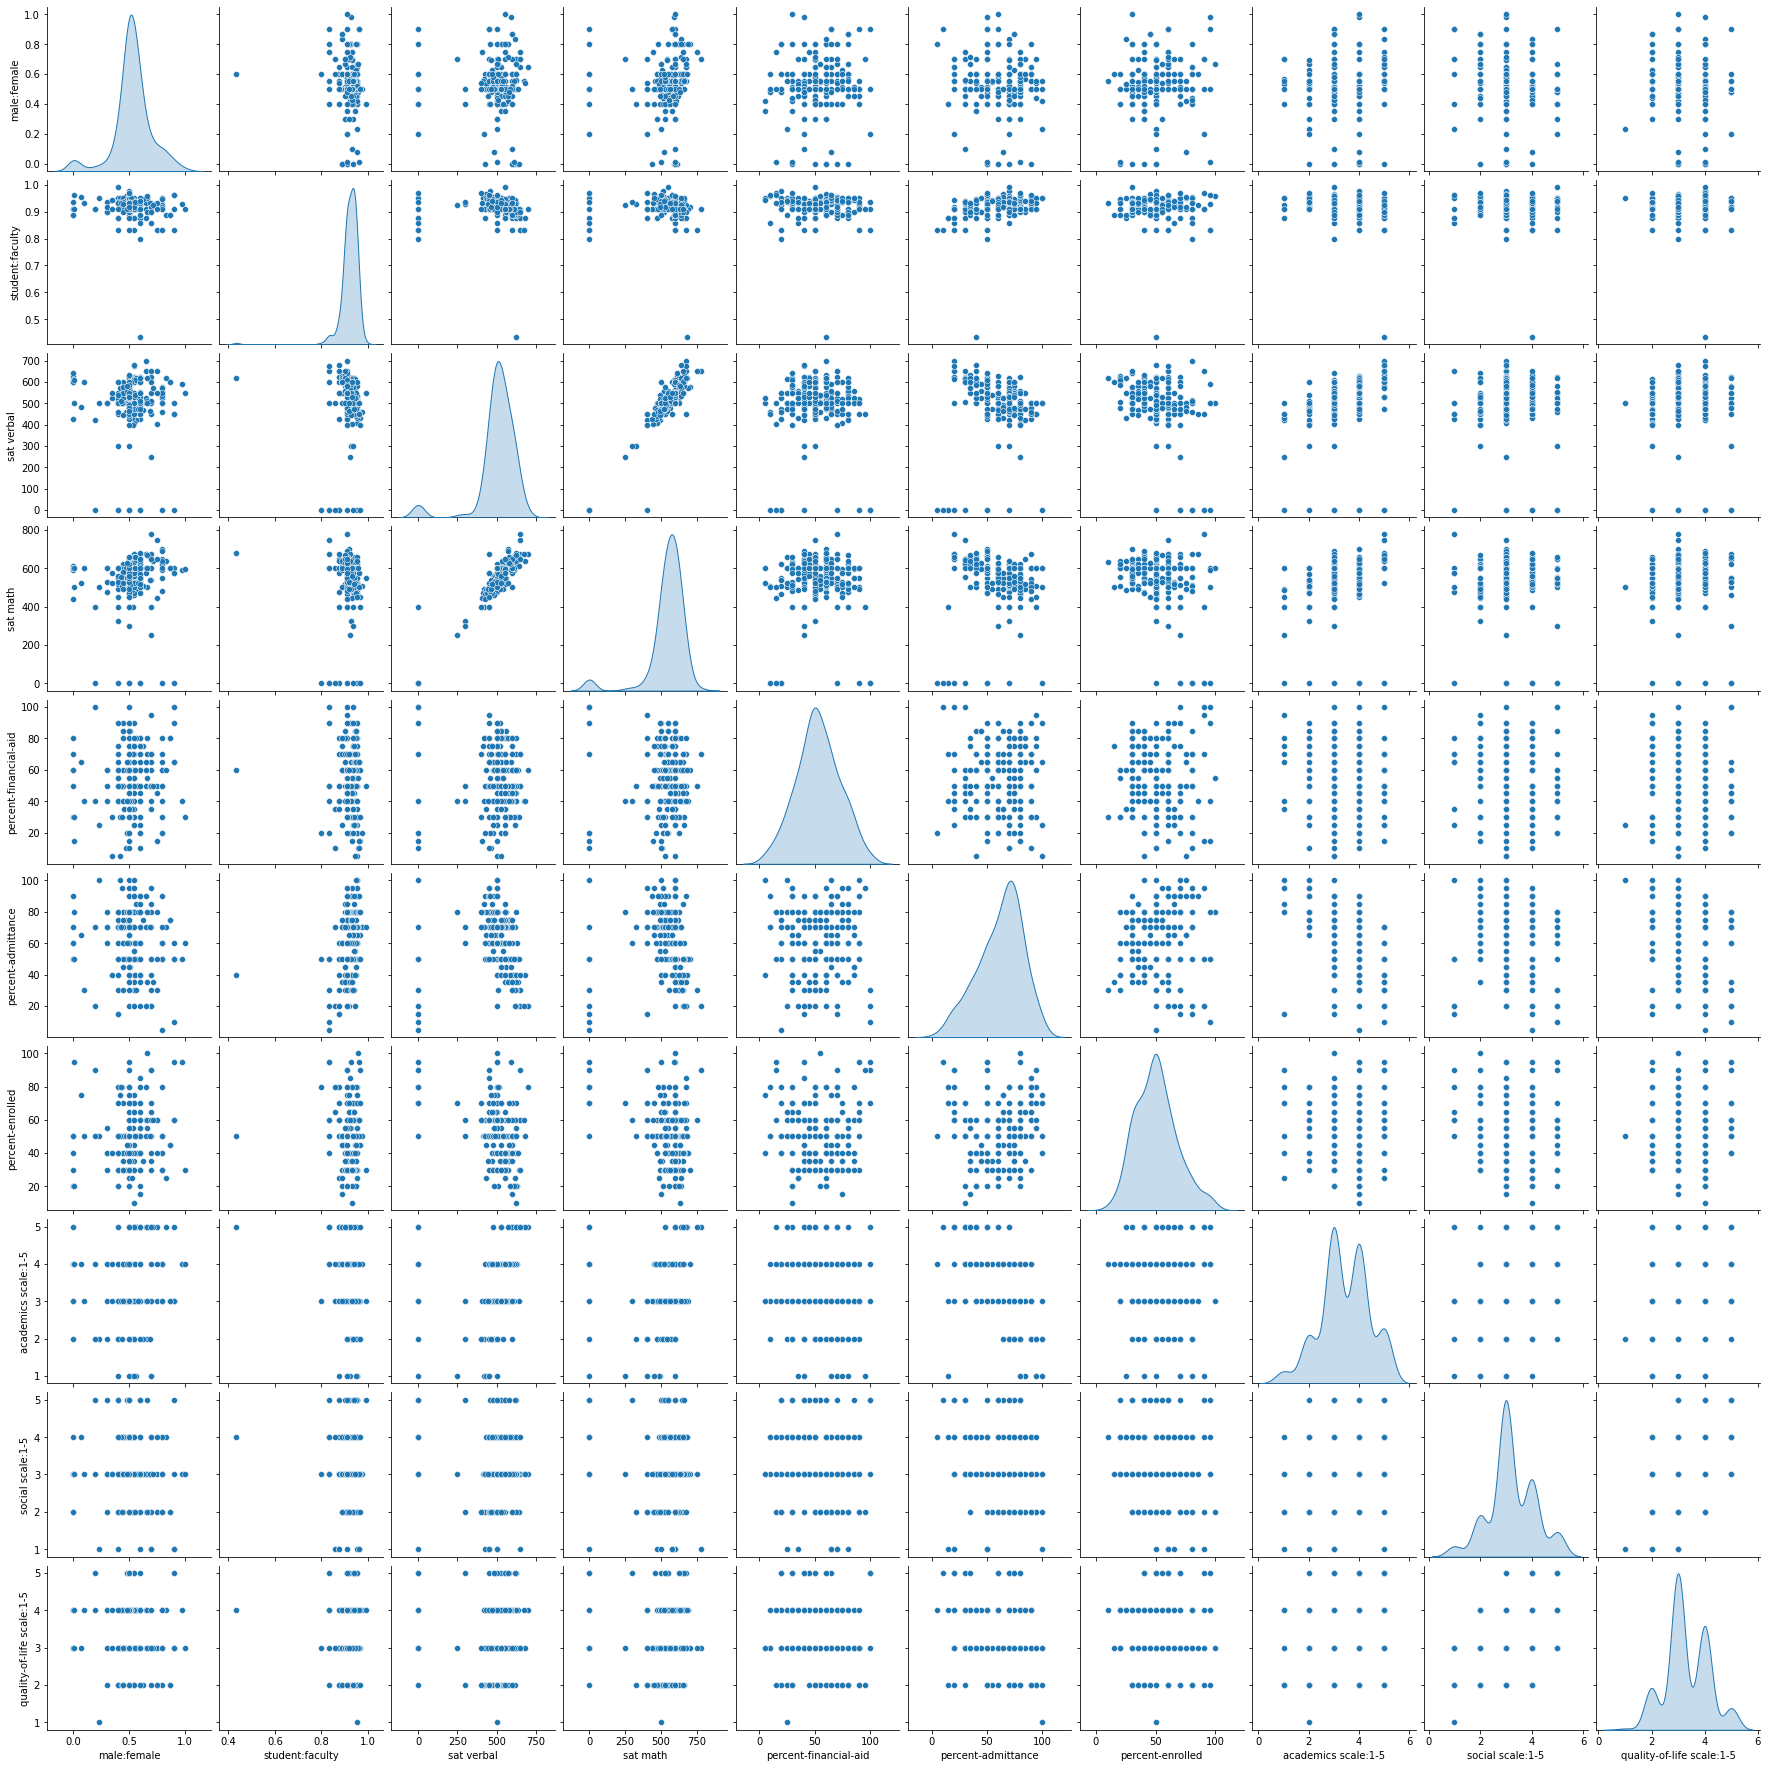

In [7]:
import seaborn as sns
display(sns.pairplot(df, diag_kind='kde'))

[Data Exploration Step](https://github.com/judyz01/ecs-171-final-project#data-exploration-step)

There are 241 observations. Male:female, student:faculty, percent-financial-aid, and percent-enrolled are all normally distributed. The distribution for sat verbal and sat math are bimodal. We have two peaks (0 and 500/600). We believe 0 means the school doesn't accept SAT score, so it makes sense that they are bimodal. The distribution for percent-admittance is left skewed. And the 3 classes we have are all multimodal distributed.

The scale for male:female is 0 to 1, 0 means all students are female and 1 means all students are male. The scale for student:faculty is also 0 to 1. The scales for the two SAT scores are 0 to 800. The scales for the 3 percentage we have are all 0 to 100. The values for our classes are 0 to 5 (5 means the best).

We updated the male:female feature from ratio to percentage. The new definition for male:female feature is how many % of students in this school are males. The new definition for student:faculty feature is how many % of people in this school are students.



[Data Preprocessing Step](https://github.com/judyz01/ecs-171-final-project#data-preprocessing-step)

We already imputed our data (we replaced NA or other invalid values with most frequent values. For one feature, we used Google to get the missing values). Since most of the data are normally distributed, we plan to scale our data using normalization and standardization. We also plan to encode our features (state, control, no-of-students, expenses, and no-applicants) using value replacement.


### Scaling our data
Scale sat verbal, sat math, percent-financial-aid, percent-admittance, and percent-enrolled.

Use StandardScaler on percent-financial-aid and percent-enrolled because they are normally destributed.

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
df[['sat verbal', 'sat math', 'percent-admittance']] = scaler.fit_transform(df[['sat verbal', 'sat math','percent-admittance']])

scaler = StandardScaler()
df[['percent-financial-aid', 'percent-enrolled']] = scaler.fit_transform(df[['percent-financial-aid', 'percent-enrolled']])

df

,name,state,control,no-of-students,male:female,student:faculty,sat verbal,sat math,expenses,percent-financial-aid,no-applicants,percent-admittance,percent-enrolled,academics scale:1-5,social scale:1-5,quality-of-life scale:1-5
adelphi,adelphi,newyork,private,thous:5-10,0.30,0.937500,0.714286,0.608974,thous$:7-10,0.359256,thous:4-7,0.684211,-0.604512,2,2,2
arizona-state,arizona-state,arizona,state,thous:20+,0.50,0.952381,0.642857,0.641026,thous$:4-7,-0.156105,thous:17+,0.789474,0.560987,3,4,5
boston-college,boston-college,massachusetts,private,thous:5-10,0.40,0.952381,0.714286,0.705128,thous$:10+,0.359256,thous:10-13,0.473684,-0.604512,4,5,3
boston-university,boston-university,massachusetts,private,thous:10-15,0.45,0.923077,0.785714,0.737179,thous$:10+,0.359256,thous:13-17,0.578947,-0.604512,4,4,3
brown,brown,rhodeisland,private,thous:5-,0.50,0.916667,0.892857,0.833333,thous$:10+,-0.671467,thous:10-13,0.157895,-0.021762,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
george-washington,george-washington,district-of-columbia,private,thous:5-,0.50,0.933333,0.757143,0.717949,thous$:10+,-0.413786,thous:4-7,0.736842,-1.187262,3,4,3
oral-roberts-university,oral-roberts-university,oklahoma,private,thous:5-,0.50,0.916667,0.661429,0.628205,thous$:4-,0.874618,thous:4-,0.631579,1.435112,4,2,3
university-of-tulsa,university-of-tulsa,oklahoma,private,thous:5-10,0.60,0.941176,0.672857,0.666667,thous$:4-,1.132299,thous:4-,0.842105,0.852362,4,4,4
connecticut-college,connecticut-college,connecticut,private,thous:5-,0.35,0.909091,0.785714,0.737179,thous$:10+,-1.186828,thous:4-,0.368421,-0.604512,4,3,4


### Encoding our data
```
control
private: 0, state: 1, city: 2

no-of-students
thous:5-: 0, thous:5-10: 1, thous:10-15: 2, thous:15-20: 3, thous:20+: 4

expenses
thous$:4-: 0, thous$:4-7: 1, thous$:7-10: 2, thous$:10+: 3

no-applicants
thous:4-: 0, thous:4-7: 1, thous:7-10: 2, thous:10-13: 3, thous:13-17: 4, thous:17+: 5
```

,name,state,control,no-of-students,male:female,student:faculty,sat verbal,sat math,expenses,percent-financial-aid,no-applicants,percent-admittance,percent-enrolled,academics scale:1-5,social scale:1-5,quality-of-life scale:1-5
adelphi,adelphi,newyork,0,1,0.30,0.937500,0.714286,0.608974,2,0.359256,1,0.684211,-0.604512,0,0,0
arizona-state,arizona-state,arizona,1,4,0.50,0.952381,0.642857,0.641026,1,-0.156105,5,0.789474,0.560987,1,1,1
boston-college,boston-college,massachusetts,0,1,0.40,0.952381,0.714286,0.705128,3,0.359256,3,0.473684,-0.604512,1,1,1
boston-university,boston-university,massachusetts,0,2,0.45,0.923077,0.785714,0.737179,3,0.359256,4,0.578947,-0.604512,1,1,1
brown,brown,rhodeisland,0,0,0.50,0.916667,0.892857,0.833333,3,-0.671467,3,0.157895,-0.021762,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
george-washington,george-washington,district-of-columbia,0,0,0.50,0.933333,0.757143,0.717949,3,-0.413786,1,0.736842,-1.187262,1,1,1
oral-roberts-university,oral-roberts-university,oklahoma,0,0,0.50,0.916667,0.661429,0.628205,0,0.874618,0,0.631579,1.435112,1,0,1
university-of-tulsa,university-of-tulsa,oklahoma,0,1,0.60,0.941176,0.672857,0.666667,0,1.132299,0,0.842105,0.852362,1,1,1
connecticut-college,connecticut-college,connecticut,0,0,0.35,0.909091,0.785714,0.737179,3,-1.186828,0,0.368421,-0.604512,1,1,1


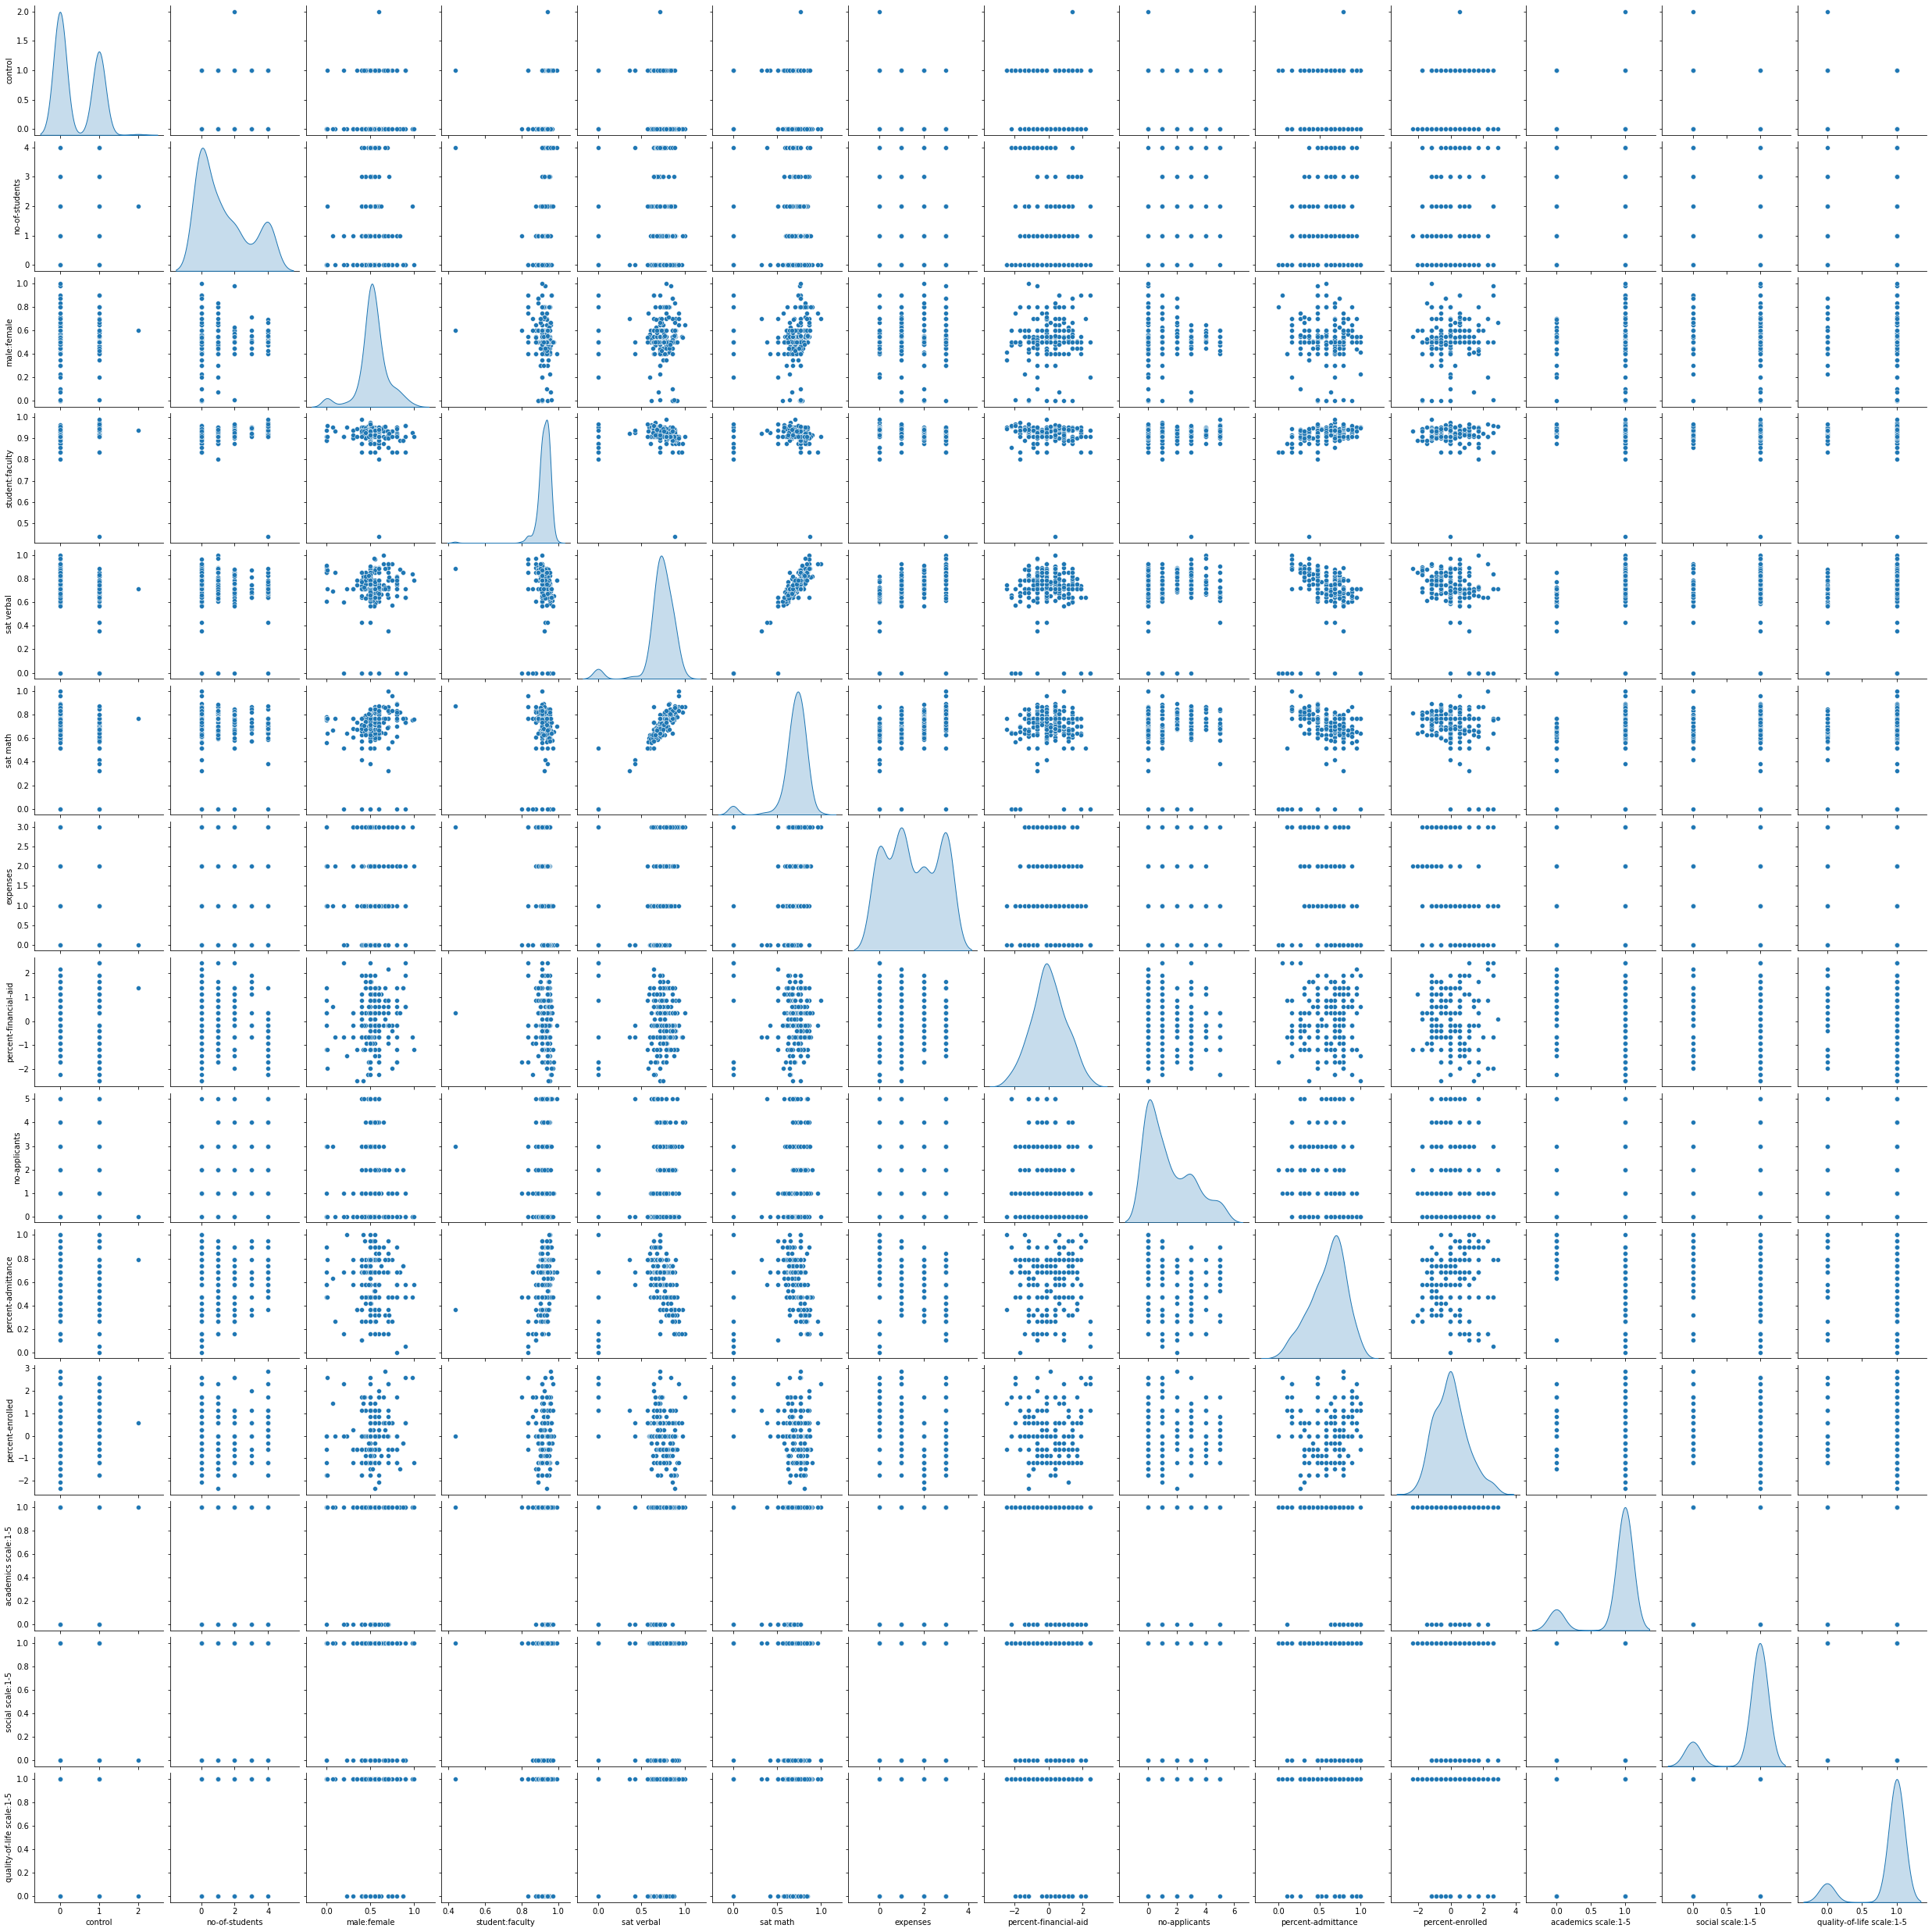

In [9]:
control = {'private': 0, 'state': 1, 'city': 2}
no_of_students = {'thous:5-': 0, 'thous:5-10': 1, 'thous:10-15': 2, 'thous:15-20': 3, 'thous:20+': 4}
expenses = {'thous$:4-': 0, 'thous$:4-7': 1, 'thous$:7-10': 2, 'thous$:10+': 3}
no_applicants = {'thous:4-': 0, 'thous:4-7': 1, 'thous:7-10': 2, 'thous:10-13': 3, 'thous:13-17': 4, 'thous:17+': 5}

df['control'] = df['control'].apply(lambda x: control[x])
df['no-of-students'] = df['no-of-students'].apply(lambda x: no_of_students[x])
df['expenses'] = df['expenses'].apply(lambda x: expenses[x])
df['no-applicants'] = df['no-applicants'].apply(lambda x: no_applicants[x])

df['academics scale:1-5'] = df['academics scale:1-5'].apply(lambda x: 1 if x >= 3 else 0)
df['social scale:1-5'] = df['social scale:1-5'].apply(lambda x: 1 if x >= 3 else 0)
df['quality-of-life scale:1-5'] = df['quality-of-life scale:1-5'].apply(lambda x: 1 if x >= 3 else 0)

display(sns.pairplot(df, diag_kind='kde'))

df

### Training our first model

In [10]:
from sklearn.model_selection import train_test_split

# X = df[['sat math', 'sat verbal']]
X = df.copy().drop(columns=['name', 'state', 'academics scale:1-5', 'social scale:1-5', 'quality-of-life scale:1-5'])
y = df[['academics scale:1-5', 'social scale:1-5', 'quality-of-life scale:1-5']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(168, 11) (73, 11) (168, 3) (73, 3)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import RandomOverSampler

def report_result(name):
    print(name)
    ros = RandomOverSampler(random_state=21)
    resampled_train_X, resampled_train_y = ros.fit_resample(X_train, y_train[f'{name} scale:1-5'])

    model = LogisticRegression()
    model.fit(resampled_train_X, resampled_train_y)

    print('training MSE:')
    yhat_train = model.predict(X_train)
    yhat_train = [min(1, max(0, round(y))) for y in yhat_train]
    print(mean_squared_error(yhat_train, y_train[f'{name} scale:1-5']))


    print('testing MSE:')
    yhat_test = model.predict(X_test)
    yhat_test = [min(1, max(0, round(y))) for y in yhat_test]
    print(mean_squared_error(y_test[f'{name} scale:1-5'], yhat_test))
    report = classification_report(y_test[f'{name} scale:1-5'], yhat_test)
    print(report)
    print('\n\n')


report_result('academics')
report_result('social')
report_result('quality-of-life')

academics
training MSE:
0.19047619047619047
testing MSE:
0.2191780821917808
              precision    recall  f1-score   support

           0       0.41      0.75      0.53        12
           1       0.94      0.79      0.86        61

    accuracy                           0.78        73
   macro avg       0.68      0.77      0.69        73
weighted avg       0.85      0.78      0.80        73




social
training MSE:
0.30357142857142855
testing MSE:
0.2328767123287671
              precision    recall  f1-score   support

           0       0.29      0.75      0.41         8
           1       0.96      0.77      0.85        65

    accuracy                           0.77        73
   macro avg       0.62      0.76      0.63        73
weighted avg       0.89      0.77      0.81        73




quality-of-life
training MSE:
0.2976190476190476
testing MSE:
0.3013698630136986
              precision    recall  f1-score   support

           0       0.19      0.44      0.27         9
 

[First Model Evaluation](https://github.com/judyz01/ecs-171-final-project#first-model-evaluation)

Our first model is a LogisticRegression model. Value >= 0.5 means it belong to class 1 (good),
value < 0.5 means it belong to class 0 (bad).
We see no sign of overfitting. Testing MSE are very close to the training MSE.
In fact, for our second class (social), testing MSE is lower than the training MSE.
However, since the MSE are higher than our expected error, perhaps this is a sign of underfitting.
Overall, we can conclude that our models are between underfitting range and ideal range range.

Second Model

In [23]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


def report_ann_result(name):
    ann_model = Sequential()
    scatter = pd.DataFrame(columns = ['epoch', 'train', 'test'])

    ann_model.add(Dense(units = 8, activation = 'relu', input_dim=11))
    ann_model.add(Dense(units = 6, activation = 'tanh'))
    ann_model.add(Dense(units = 6, activation = 'sigmoid'))
    ann_model.add(Dense(units = 2, activation = 'tanh'))
    ann_model.add(Dense(units = 1, activation = 'sigmoid'))

    ros = RandomOverSampler(random_state=21)
    resampled_train_X, resampled_train_y = ros.fit_resample(X_train, y_train[f'{name} scale:1-5'])

    ann_model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
    for i in range(15):
      
      ann_model.fit(resampled_train_X, resampled_train_y, batch_size = 10, epochs = 10)
      yhat_train = ann_model.predict(X_train)
      yhat_train = [ 1 if y>=0.5 else 0 for y in yhat_train ]
      yhat_test = ann_model.predict(X_test)
      yhat_test = [ 1 if y>=0.5 else 0 for y in yhat_test ]
      # Saving the epoch 80
      if i == 7:
        final_yhat_train = yhat_train
        final_yhat_test = yhat_test
      scatter = scatter.append({'epoch':10*(i+1), 'train':mean_squared_error(yhat_train, y_train[f'{name} scale:1-5']), 'test':mean_squared_error(y_test[f'{name} scale:1-5'], yhat_test)}, ignore_index=True)
      
    print(scatter)
    plt.xlabel("Epoch")
    plt.ylabel("MSE") 
    plt.plot(scatter.epoch, scatter.train, label = "train", linestyle="-")
    plt.plot(scatter.epoch, scatter.test, label = "test", linestyle="-")
    plt.legend()
    plt.show()
    
    print(name)
    print("for epoch = 80")
    print('training MSE:')
    # yhat_train = ann_model.predict(X_train)
    # yhat_train = [ 1 if y>=0.5 else 0 for y in yhat_train ]
    print(mean_squared_error(final_yhat_train, y_train[f'{name} scale:1-5']))


    print('testing MSE:')
    # yhat_test = ann_model.predict(X_test)
    # yhat_test = [ 1 if y>=0.5 else 0 for y in yhat_test ]
    print(mean_squared_error(y_test[f'{name} scale:1-5'], final_yhat_test))
    print(classification_report(y_test[f'{name} scale:1-5'], final_yhat_test))

Epoch 1/10
29/29 [==============================] - 1s 2ms/step - loss: 0.7162
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 0.6969
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 0.6878
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 0.6819
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6771
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6708
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6639
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6563
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6480
Epoch 10/10
3/3 [==============================] - 0s 4ms/step
Epoch 1/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6310
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6218
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - lo

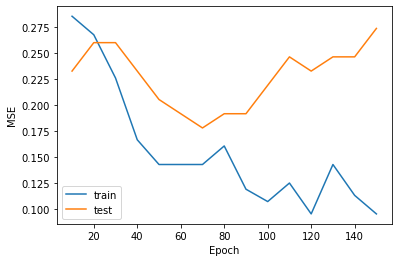

academics
for epoch = 80
training MSE:
0.16071428571428573
testing MSE:
0.1917808219178082
              precision    recall  f1-score   support

           0       0.42      0.42      0.42        12
           1       0.89      0.89      0.89        61

    accuracy                           0.81        73
   macro avg       0.65      0.65      0.65        73
weighted avg       0.81      0.81      0.81        73



In [25]:
report_ann_result('academics')

Epoch 1/10
28/28 [==============================] - 1s 3ms/step - loss: 0.6885
Epoch 2/10
28/28 [==============================] - 0s 3ms/step - loss: 0.6834
Epoch 3/10
28/28 [==============================] - 0s 3ms/step - loss: 0.6793
Epoch 4/10
28/28 [==============================] - 0s 3ms/step - loss: 0.6732
Epoch 5/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6667
Epoch 6/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6590
Epoch 7/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6507
Epoch 8/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6418
Epoch 9/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6334
Epoch 10/10
3/3 [==============================] - 0s 5ms/step
Epoch 1/10
28/28 [==============================] - 0s 2ms/step - loss: 0.6159
Epoch 2/10
28/28 [==============================] - 0s 3ms/step - loss: 0.6081
Epoch 3/10
28/28 [==============================] - 0s 2ms/step - lo

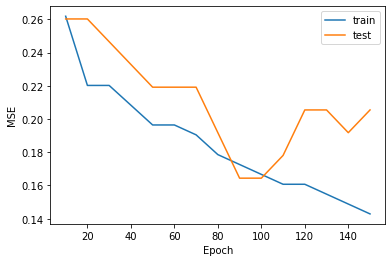

social
for epoch = 80
training MSE:
0.17857142857142858
testing MSE:
0.1917808219178082
              precision    recall  f1-score   support

           0       0.33      0.75      0.46         8
           1       0.96      0.82      0.88        65

    accuracy                           0.81        73
   macro avg       0.65      0.78      0.67        73
weighted avg       0.89      0.81      0.84        73



In [32]:
report_ann_result('social')

Epoch 1/10
29/29 [==============================] - 1s 3ms/step - loss: 0.7521
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 0.7211
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 0.7027
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6922
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6849
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6786
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6733
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6674
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6619
Epoch 10/10
3/3 [==============================] - 0s 4ms/step
Epoch 1/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6502
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6441
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - lo

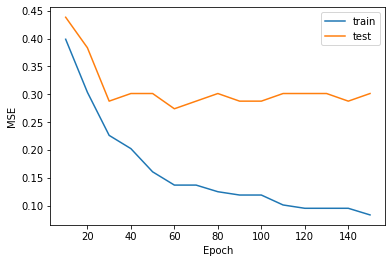

quality-of-life
for epoch = 80
training MSE:
0.125
testing MSE:
0.3013698630136986
              precision    recall  f1-score   support

           0       0.12      0.22      0.15         9
           1       0.88      0.77      0.82        64

    accuracy                           0.70        73
   macro avg       0.50      0.49      0.49        73
weighted avg       0.78      0.70      0.73        73



In [39]:
report_ann_result('quality-of-life')